In [50]:
import pandas as pd
df = pd.read_csv("/content/placement.csv")


In [51]:
#1 . Printing The dataset
df 

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [52]:
#2.Exploratory Data Analysis
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [53]:
#Describing The Dataset
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [54]:
#Dropping The NULL Values
df = df.dropna()
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [76]:
#Calculating Covariance
df.corr()

,cgpa,placement_exam_marks,placed
cgpa,1.000000,-0.027371,0.027212
placement_exam_marks,-0.027371,1.000000,-0.025530
placed,0.027212,-0.025530,1.000000


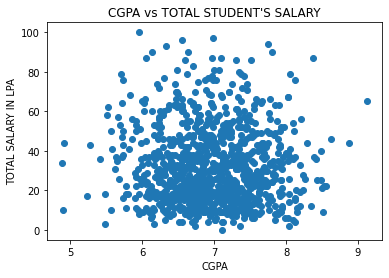

In [55]:
#3. Data Visualization
import matplotlib.pyplot as plt
plt.xlabel("CGPA")
plt.ylabel("TOTAL SALARY IN LPA")
plt.title("CGPA vs TOTAL STUDENT'S SALARY")
plt.scatter(df['cgpa'],df['placement_exam_marks'])

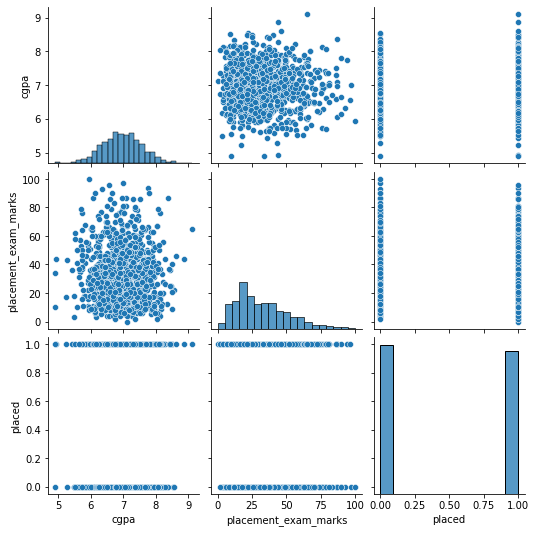

In [56]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

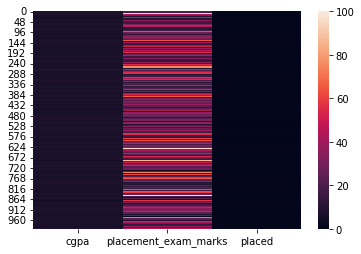

In [57]:
#Printing The HeatMap
sns.heatmap(df)

<AxesSubplot:ylabel='Count'>

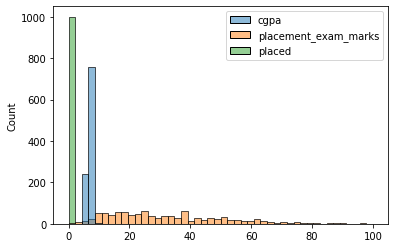

In [77]:
sns.histplot(df)

In [58]:
#Now Let us predict the total students LPA based on the student

#The general equation for a straight line is y = mx + c
#Here,
# y = Total student's salary in LPA corresponding to that CGPA
# x = CGPA
# m = Slope of the Line
# c = Intercept

In [59]:
#importing the modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

In [60]:
#4.Create Input And Output Variables
cgpa = df.iloc[:,0:1].values
lpa = df.iloc[:,1].values

In [61]:
#5.Fitting The model
model = LinearRegression()
model.fit(cgpa,lpa)

LinearRegression()

In [62]:
#6. Map Input To Output
y_pred = model.predict(cgpa)
y_pred

array([32.03051128, 31.80096086, 31.73294592, 32.68515507, 31.99650381,
       31.93699074, 32.45560465, 32.09002435, 32.65964947, 31.5544067 ,
       32.34508038, 32.71916254, 32.54912519, 33.31429326, 31.41837682,
       32.10702809, 32.59163453, 31.71594218, 32.25155983, 31.65642911,
       32.45560465, 31.82646646, 32.39609158, 32.99972417, 32.66815134,
       32.80418122, 31.80946273, 32.59163453, 31.99650381, 32.60863827,
       31.80096086, 31.63092351, 33.11875031, 32.84669055, 31.21433201,
       31.78395712, 32.31957477, 30.90826478, 32.54912519, 31.97950008,
       32.53212146, 32.44710279, 31.80096086, 31.46938803, 31.44388243,
       32.2600617 , 31.93699074, 32.2600617 , 32.79567935, 31.14631707,
       32.87219616, 32.83818869, 31.74144779, 32.45560465, 30.98478158,
       31.23983761, 32.25155983, 31.57141044, 31.90298327, 31.59691604,
       31.39287122, 31.75845152, 31.67343285, 32.85519242, 32.2090505 ,
       32.81268309, 32.47260839, 31.30785255, 32.54912519, 31.84

In [63]:
#Predicting LPA for given cgpa
model.predict([[8.26]])

array([31.12081146])

In [64]:
#Analysing The slope and intercept

In [65]:
#to get slope
slope = model.coef_
slope

array([-0.85018674])

In [66]:
#to get intercept
intercept = model.intercept_ 
intercept

38.14335397274452

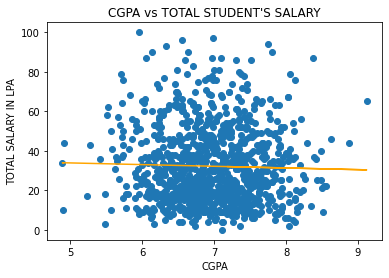

In [67]:
#Plotting The best fit line
plt.xlabel("CGPA")
plt.ylabel("TOTAL SALARY IN LPA")
plt.title("CGPA vs TOTAL STUDENT'S SALARY")
plt.scatter(df['cgpa'],df['placement_exam_marks'])
plt.plot(df['cgpa'],y_pred,color='orange')

#here the orange line denotes the best fit line
#blue points denote the actual values
#best fit line denotes predicted values

In [68]:
#Calculating Accuracy Of Regression Model

from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_squared_error
mean_absolute_percentage_error(lpa,y_pred)*100

1.4455891072308316e+16

In [69]:
#r2_score
r2_score(lpa,y_pred)*100

0.07491672661754656

In [70]:
#MSE
mean_squared_error(lpa,y_pred)*100

36534.846268486865

In [75]:
#Reshaping the arrays
from sklearn.model_selection import train_test_split 
X = df['cgpa'].values.reshape(-1,1)
Y = df['placement_exam_marks'].values.reshape(-1,1)
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(X,Y,test_size = 0.5)
model.fit(X_TRAIN,Y_TRAIN)
y_pred = model.predict(X_TEST)
r2_score(Y_TRAIN,y_pred)*100


-0.5359142576094822